**Review**

Hello Mazin!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


# Predicting The Amount of Gold Recovered From Gold Ore Through Machine Learning

## Introduction

We have data from Zyfra, a company that develops efficiency solutions for heavy industry. Mined gold ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.

Using the extraction and purification data, we will prepare a prototype of a machine learning model for Zyfra that predicts the amount of gold recovered from gold ore. The model will help to optimize the production of gold and eliminate unprofitable parameters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
trainset = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
testset = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
fullset = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

In [3]:
display(trainset.head())
display('\n ')
trainset.isna().sum()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


'\n '

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

In [4]:
display(trainset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

None

In [5]:
testset.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

In [7]:
fullset.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
fullset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

- Our source or full dataset has 87 columns and 22k rows. 
- Our training set has all 87 columns, but under 17k rows.
- Our test dataset only has 53 columns and fewer than 6k rows.  

Our full dataset has been split into training and testing sets at a ratio of 75:25. 

###### Calculating Recovery

Recovery = C * (F - T)

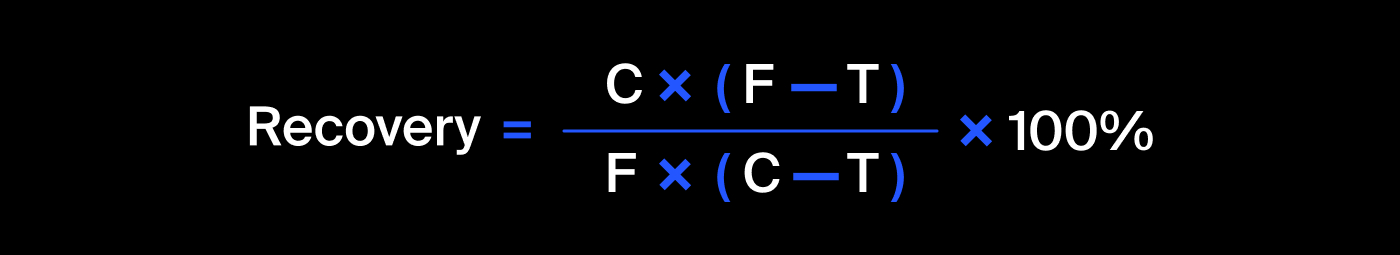

Using the formula above we will confirm that recovery is calculated correctly with:
- C = share of gold in the concentrate right after flotation 
- F = share of gold in the feed before flotation
- T = share of gold in the rougher tails right after flotation



We will go over the training set and calculate recovery for the rougher.output.recovery feature as well as the mean absolute error (MAE) between our calculations and the feature values. 

In [9]:
#writing the function to calculate recovery
def recovery(c, f, t):                     #
    recovery_result= (c*(f-t)/(f*(c-t)))*100
    return recovery_result

C = share of gold in the concentrate right after flotation 
F = share of gold in the feed before flotation
T = share of gold in the rougher tails right after flotation


In [10]:
#applying the function on our training set
trainset['recovery.result'] = recovery(trainset['rougher.output.concentrate_au'], trainset['rougher.input.feed_au'], trainset['rougher.output.tail_au'])

In [11]:
trainset[['recovery.result', 'rougher.output.recovery']]

,recovery.result,rougher.output.recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
...,...,...
2018-08-18 06:59:59,89.574376,89.574376
2018-08-18 07:59:59,87.724007,87.724007
2018-08-18 08:59:59,88.890579,88.890579


In [12]:
trainset["recovery.result"].describe()

count    1.457700e+04
mean              NaN
std               NaN
min              -inf
25%      7.965104e+01
50%      8.521533e+01
75%      9.019726e+01
max               inf
Name: recovery.result, dtype: float64

The rougher.output.recovery does not appear to contain errors in the tail or head of the training set. We will calculate the MAE between the original result and the new one we calculated.

In [13]:
trainset["recovery.result"].replace([np.inf, -np.inf], np.nan, inplace=True)
train_set_subset = trainset.loc[:, ["rougher.output.recovery", "recovery.result"]].dropna(axis=0)
print(train_set_subset.shape)
og_recovery = train_set_subset['rougher.output.recovery']
new_recovery = train_set_subset['recovery.result']

(14287, 2)


In [14]:
og_recovery.isna().sum()

0

In [15]:
mean_absolute_error(og_recovery, new_recovery)

9.303415616264301e-15

The MAE between rougher.output.recovery and our new result in recovery.result is very low, signifying neglible degree =of difference between the two sets of numbers. This low MAE score confirms that recovery was calculated correctly in the training set.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

Checking which columns are present in the testset that are not present in the training set and vice versa

In [16]:
#checking if all testset columns are in the training set
[col for col in testset.columns if col not in trainset.columns]

[]

There are none. Now we check the other way around, for which columns are in the training set that are not in the test dataset. 

In [17]:
#checking if all training set columns are in the test set
missing_cols = [col for col in trainset.columns if col not in testset.columns]
print(len(missing_cols))
print(missing_cols)

35
['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.

There are 35 columns in the training set that are not present in the test dataset. These datasets represent the outputs for the concentrate and various elements after each stage of purification. This is done so that the Machine Learning model can predict the missing column values and be assessed on accuracy,   

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

### Exploring the Change in Concentration of Metals During Purification 

We will analyze the datasets and explore how the concetrations of metals (Au, Ag, Pb) change depending on the purification stage.

###### Change in Au (gold) concetration

Text(0, 0.5, 'AU concentration %')

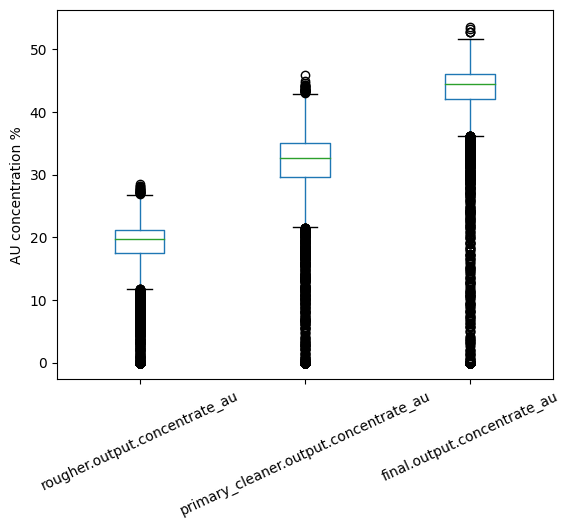

In [18]:
trainset.loc[:, ["rougher.output.concentrate_au",
                "primary_cleaner.output.concentrate_au",
                "final.output.concentrate_au"]].plot.box()
plt.xticks(rotation=25)
plt.ylabel('AU concentration %')

In [19]:
display(trainset.loc[:, ["rougher.output.concentrate_au",
                "primary_cleaner.output.concentrate_au",
                "final.output.concentrate_au"]].median())

rougher.output.concentrate_au            19.644663
primary_cleaner.output.concentrate_au    32.648867
final.output.concentrate_au              44.498874
dtype: float64

The chart above plots the Au (gold) concentrations throughout different purification stages. After the gold ore input mixture goes through flotation, the first purifcation stage, it is about 20% pure. This is known as the rougher concentrate. Then this rougher concentrate goes through the first stage of a 2-stage cleaning process. After the initial cleaning, the concentrate is referred to as primary_cleaner.output.concentrate_au and has a much larger gold concentration at ~33. Finally, after the mixture goes through the second stage of the cleaning process, it becomes the final.output.concentrate_au, with a median concentration of ~44%.

###### Change in Ag (silver) concetration

Text(0, 0.5, 'AG concentration %')

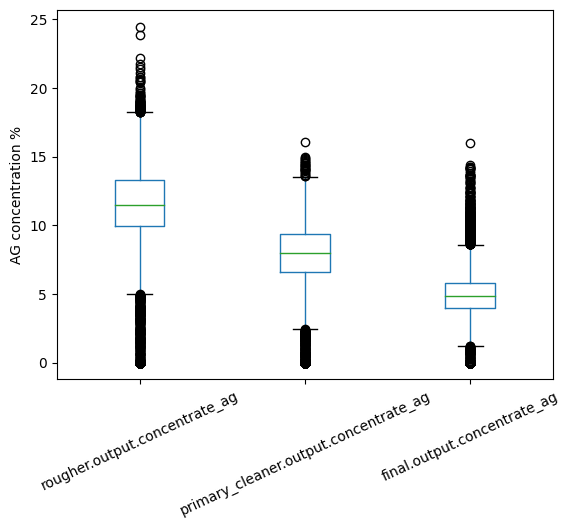

In [20]:
trainset.loc[:, ["rougher.output.concentrate_ag",
                "primary_cleaner.output.concentrate_ag",
                "final.output.concentrate_ag"]].plot.box()
plt.xticks(rotation=25)
plt.ylabel('AG concentration %')

In [21]:
display(trainset.loc[:, ["rougher.output.concentrate_ag",
                "primary_cleaner.output.concentrate_ag",
                "final.output.concentrate_ag"]].median())

rougher.output.concentrate_ag            11.459862
primary_cleaner.output.concentrate_ag     7.997143
final.output.concentrate_ag               4.869346
dtype: float64

Interestingly, we observe that the process of purification has the inverse effect on silver than we witnessed above on gold. Whereas the micture sees increasingly higher gold concetrations during purification, the silver concetration drops from ~11.5% initially after flotation, to 8% after stage 1 of cleaning, and finally just under 5% after stage 2 of cleaning. This is a 57% reduction post-flotation to final output, and appears to be an undesirable side-effect of processing for gold given silver's value.

###### Change in Pb (lead) concetration

Text(0, 0.5, 'AG concentration %')

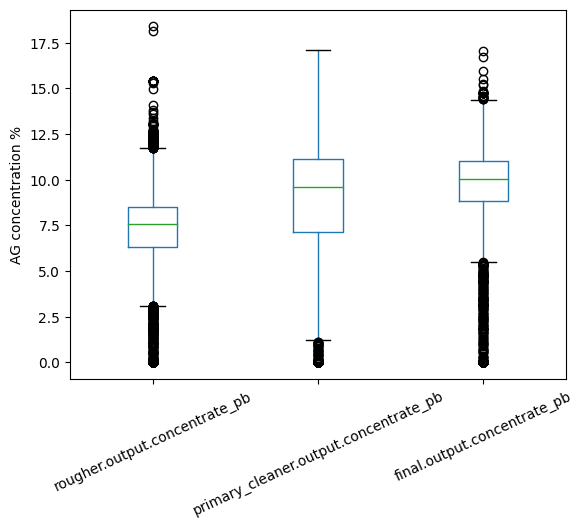

In [22]:
trainset.loc[:, ["rougher.output.concentrate_pb",
                "primary_cleaner.output.concentrate_pb",
                "final.output.concentrate_pb"]].plot.box()
plt.xticks(rotation=25)
plt.ylabel('AG concentration %')

In [23]:
display(trainset.loc[:, ["rougher.output.concentrate_pb",
                "primary_cleaner.output.concentrate_pb",
                "final.output.concentrate_pb"]].median())

rougher.output.concentrate_pb             7.583773
primary_cleaner.output.concentrate_pb     9.618910
final.output.concentrate_pb              10.065316
dtype: float64

The concentration of lead increases throughout the purification stages but not as drastically as the concetration of gold. The share of lead rises from 7.6%, to 9.6%, to 10%. This represents a 32% increase post-flotation to final output, a fraction of the 226% increase in gold concentration post-flotation to output. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

### Comparing feed sizes

We will compare feed sizes of the test and training sets to note any differences. To compare feed sizes, we must ensure that rougher.input.feed_size is equally sized within the training and test sets, as a large imbalance affects model accuracy.

In [24]:
display(trainset["rougher.input.feed_size"].shape)
testset["rougher.input.feed_size"].shape

(16860,)

(5856,)

In [25]:
trainfeed = trainset["rougher.input.feed_size"][:5856]

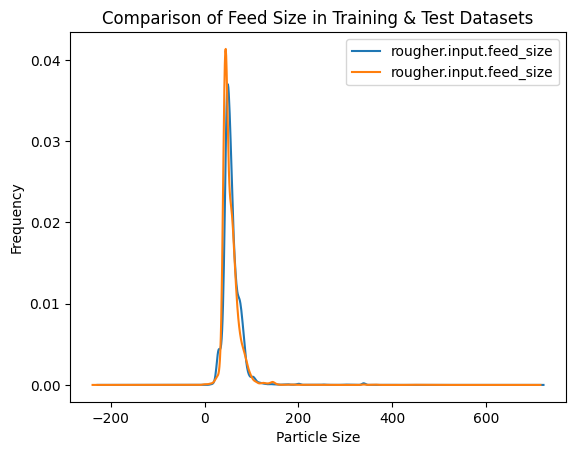

54.10425711683596

50.00200413056189

In [26]:
#trainfeed = pd.DataFrame(trainset["rougher.input.feed_size"])
trainset["rougher.input.feed_size"].plot.kde()
testset["rougher.input.feed_size"].plot.kde()
plt.title('Comparison of Feed Size in Training & Test Datasets')
plt.ylabel('Frequency')
plt.xlabel('Particle Size')
plt.legend()
plt.show()

display(trainset["rougher.input.feed_size"].median())
display(testset["rougher.input.feed_size"].median())

The chart above shows that the input feed sizes for the training and test sets were quite similar with minor differences between the two, with median values between 50 and 54. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

### Comparing total concentrations of all substances throughout the process

In [27]:
(fullset['rougher.output.concentrate_ag'] == 0).sum()
fullset.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [28]:
# rougher_input_feed = fullset[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']]

# rougher_output_concentrate = fullset[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
#                                       'rougher.output.concentrate_au']] 
# final_output_concentrate = fullset[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']]

In [29]:
# rougher_input_feed = fullset[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']]

# rougher_output_concentrate = fullset[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
#                                       'rougher.output.concentrate_au']] 
# final_output_concentrate = fullset[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']]



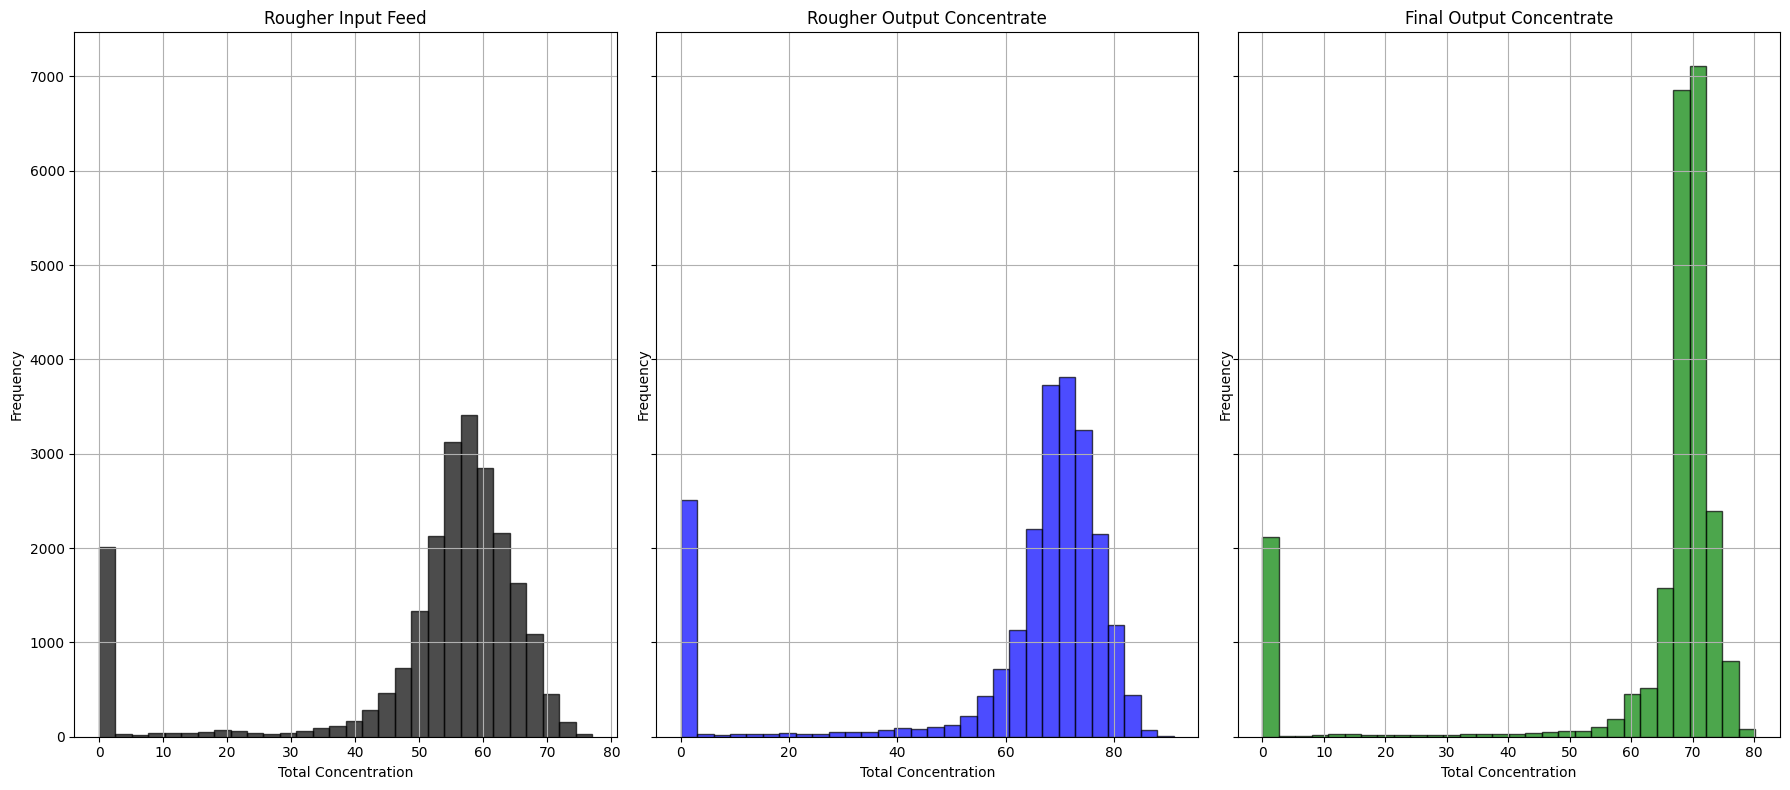

In [30]:
rougher_input_feed = fullset[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 
                              'rougher.input.feed_sol']].sum(1)

rougher_output_concentrate = fullset[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                                      'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']].sum(1) 
final_output_concentrate = fullset[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 
                                    'final.output.concentrate_sol']].sum(1)

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

rougher_input_feed.hist(ax=axes[0], bins=30, alpha=0.7, color='black', edgecolor='black')
axes[0].set_title('Rougher Input Feed')
axes[0].set_xlabel('Total Concentration')
axes[0].set_ylabel('Frequency')

rougher_output_concentrate.hist(ax=axes[1], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Rougher Output Concentrate')
axes[1].set_xlabel('Total Concentration')
axes[1].set_ylabel('Frequency')

final_output_concentrate.hist(ax=axes[2], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[2].set_title('Final Output Concentrate')
axes[2].set_xlabel('Total Concentration')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:

# # Create histograms
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.hist(rougher_input_feed, bins=30, color='black', alpha=0.7, edgecolor='black')
# plt.title("Histogram of rougher.input.feed")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

# plt.subplot(1, 3, 2)
# plt.hist(rougher_output_concentrate, bins=30, color='red', alpha=0.7, edgecolor='black')
# plt.title("Histogram of rougher.output.concentrate")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

# plt.subplot(1, 3, 3)
# plt.hist(final_output_concentrate, bins=30, color='green', alpha=0.7, edgecolor='black')
# plt.title("Histogram of final.output.concentrate")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

# plt.tight_layout()
# plt.show()

During the raw input feed stage, Lead is the least abundant element comprising just under 5% of the concentration. This is followed by gold & silver, which mirror one another closely making up 8% of the mixture. The majority of the mixture is a colloidal solution making up almost 40% of the raw inputs. 

Flotation is the first stage of purification resulting in rougher concentrate. This rougher concentrate also has lead as the least abundant element, although it is doubled at 9%.  Silver makes up 12% of this, a dramatic increase of 50%, while gold sees an almost 3x increase composing 21% of this mixture. Colloidal solution has been reduced to ~31% of the rougher concentrate. 

There is a 2-stage cleaning process, after which we receive the final outputs of the purification. Silver becomes the least abundant substance at 7%, followed by a reduced colloidal solution at 10%, and lead at ~14%. Gold, the  desired end product, becomes 44% of the final output. 

In the last 3 histograms we can observe the total concentrations of Pb, Au, Ag, and Sol collectively:
- At the rougher input stage, these substances constitute just under 60% of the concentrate
- During rougher output, the 3 substances make up just over 70% of the concentrate
- During final output, the total concentration increases to ~70%, albeit with a much larger proportion of this being gold 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

In this task you need to analyse total concentrations but not separate ones. You don't have total concentrations in the initial dataset and so you need to calculate them at first. 
    
So, you need to calcualte 3 total concetrations here: rougher.input.feed, rougher.output.concentrate and final.output.concentrate. For each total concentration you need to plot a histogram. On these histograms you will see pick near zero.  Is is possible to have near zero total concentration at any stage? Nope. So, please, remove rows with near zero total concentration at any stage.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Why did you create some random normal data and analyse it? It doesn not make any sense. You should analyze the given data but not create your own random one. So, please, read my previous comment and do exactly what I asked you.
  
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Correct. Good job! But what is about outliers? I wrote about it above: "On these histograms you will see pick near zero. Is is possible to have near zero total concentration at any stage? Nope. So, please, remove rows with near zero total concentration at any stage."
  
</div>

## Writing a sMAPE Function

We will build models to predict our targets shortly and will cross validate them using sMAPE, or Symmetric Mean Absolute Percentage Error. This is a measure of accuracy and like the MAE, the closer to 0 the better. 

To asses sMAPE, we will write it according to the formula below: 

We will calculate sMAPE scores for 'rougher.output.recovery' and 'final.output.recovery' for several models on the validation set and identify the best model with the lowest scores. We will also calculate final sMAPE which is a weighted measure using the sMAPE scores for our two targets:

Final sMAPE = 25% * sMAPE(rougher) + 75%  * sMAPE(final)

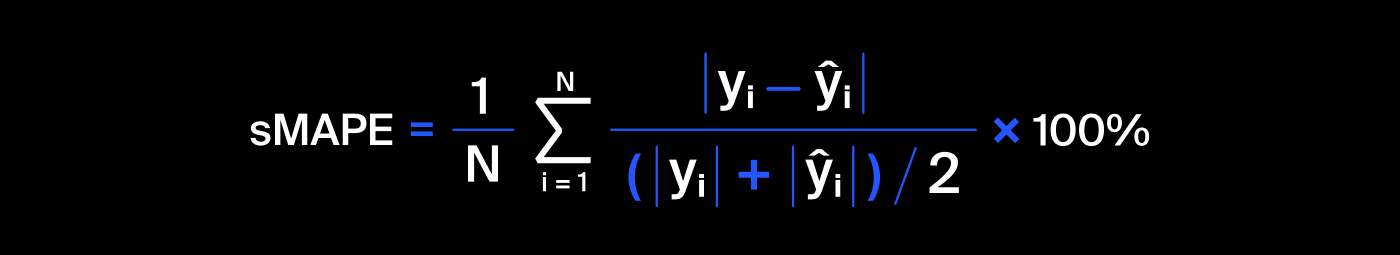

In [32]:
# def sMAPE_calc(target_valid, predicted_valid): 
#     nor = np.abs(target_valid - predicted_valid)                 
#     denor = (np.abs(target_valid) + np.abs(predicted_valid))/2
#     if np.isnan(nor).any() is True:
#         raise Exception('nor contains NaN')
#     if np.any(denor == 0) or np.any(np.isnan(denor)):
#         raise Exception('denor contains NaN')
#     result = np.mean(nor / denor)*100
#     return result

In [33]:
def smape(y_true,y_pred):
    error = (y_true -  y_pred).abs()
    scale= (y_true.abs() +  y_pred.abs())/2
    return(error/scale).mean() *100

def smape_w(y_true,y_pred):
    rougher = smape(y_true[0],y_pred[0])
    final = smape(y_true[1],y_pred[1])
    return 0.25*rougher + 0.75*final

In [34]:
# def sMAPE_calc2(target_valid, predicted_valid): 
#     nor = np.abs(target_valid - predicted_valid)                 
#     denor =np.abs(target_valid + predicted_valid)/2
#     return np.mean(nor/denor)

# def final_sMAPE_calc2(target, pred):
#     rougher = sMAPE_calc2(targets[0], pred[0])
#     final = sMAPE_calc2(targets[1], pred[1])
#     result = (0.25 * rougher.mean()) + (0.75 * final.mean()) *100
#     return result

In [35]:
trainset = trainset.fillna(method='ffill')
testset = testset.fillna(method='ffill')
fullset = fullset.fillna(method='ffill')
trainset.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery.result                               0
Length: 87, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

In [36]:
# summation = 0
# for i in range(len(a)):
#     nor = np.abs(a[i] - b[i])
#     denor = np.abs(a[i]) + np.abs(b[i])
#     denor = denor / 2
#     summation += (nor / denor)
# (summation/len(a))*100


In [37]:
smape_score = make_scorer(smape, greater_is_better=False)

In [38]:
# smape_score_final = make_scorer(final_sMAPE_calc2, greater_is_better=False)

In [39]:
feature_names = testset.columns
display(feature_names)

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

## Building the Models

In [40]:
features_train = trainset[feature_names].reset_index(drop=True)
# target_train_r= trainset['rougher.output.recovery'].reset_index(drop=True)
# target_train_f = trainset['final.output.recovery'].reset_index(drop=True)

In [41]:
# trainset = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
# testset = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
# fullset = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Why did you read the datasets for the second time? It's not a good idea. Because of it you lost all the data preprocessing you did above. Datasets should be read only once at the beginning of the project.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
  
</div>

In [42]:
# trainset = trainset.fillna(method='ffill')
# testset = testset.fillna(method='ffill')
# fullset = fullset.fillna(method='ffill')
features = testset.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

You've already filled all the NaNs above. You should not do it for the second time.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
  
</div>

In [43]:
features_train = trainset[features].reset_index(drop=True)
target_train = trainset[targets].reset_index(drop=True)

features_test = fullset[features].loc[testset.index].reset_index(drop=True)
target_test = fullset[targets].loc[testset.index].reset_index(drop=True)
target_test.columns = [0,1]

In [44]:
features_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [45]:
target_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [46]:
features_train.shape

(16860, 52)

In [47]:
# def smape(y_true,y_pred):
#     error = (y_true -  y_pred).abs()
#     scale= (y_true.abs() +  y_pred.abs())/2
#     return(error/scale).mean() *100

# def smape_w(y_true,y_pred):
#     rougher = smape(y_true[0],y_pred[0])
#     final = smape(y_true[1],y_pred[1])
#     return 0.25*rougher + 0.75*final

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

You've already defined these functions above. Any unique action should be done only once.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
  
</div>

In [48]:
target_train.columns = [0,1]

In [49]:
def score_model(model, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain,target_subtrain )
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        scores.append(smape_w(target_valid, pred_valid))
    return pd.Series(scores).mean()

In [50]:
#feature scaling our data
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [51]:
model = LinearRegression()
lr_score = score_model(model)
display(lr_score)

17.677940401890996

In [52]:
model2 = DecisionTreeRegressor(random_state=12345)    #creating a model
dt_score = score_model(model2)
display(dt_score)

26.07410495468665

In [53]:
model3 = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=2)   
rf_score = score_model(model3)
display(rf_score)

15.683160582939347

At 15.6, the lowest sMAPE score we encountered was for Random Forest. This scored better than our other models and we will now make predictions for our testset. 

In [54]:
features_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [55]:
rfr_model = RandomForestRegressor(random_state=12345, n_estimators=50, max_depth=2)   #creating a model
rfr_model.fit(features_train, target_train)               #training 
predicted_valid = rfr_model.predict(features_test)       #making predictions for the validation set
smape_w(target_test, pd.DataFrame(predicted_valid))
#display("Model 3 has been trained", score3.mean())

11.90360030073418

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Please, check variable names
  
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Not fixed
  
</div>

Our model did better on the test set than it did during training. We have a final sMAPE score of 11.9. We will now tune hyperparameters to see if we can get an even lower score. 

###### Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [1, 2, 4, 8, 12, 15]
}

grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(features_train, target_train)
grid_search.best_params_ 

Our new best model is a Random Forest Regressor with a max_depth of 8 and 50 estimators. We will see how it scores on sMAPE.

In [58]:
model_rf = RandomForestRegressor(random_state=12345, max_depth=8, n_estimators=50)
model_rf.fit(features_train, target_train)
predicted_test_rf = model_rf.predict(features_test)
smape_w(target_test, pd.DataFrame(predicted_test_rf))

11.379302328845226

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Please, check variable names
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
  
</div>

###### Sanity Check with Constant Model

In [64]:
model_dr = DummyRegressor(strategy="mean")
model_dr.fit(features_train, target_train)
predicted_test_dr = model_dr.predict(features_test)       #making predictions for the validation set
smape_w(target_test, pd.DataFrame(predicted_test_dr))

13.180697474259352

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Please, check variable names
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed
  
</div>

Our constant model predicting the mean did fairly well, with only the Random Forest Regression beating it out on the training set. Our best performing Random Forest model scored higher than the constant model  at 11.3, confirming that our model is a more accurate predictor of mining outputs than assuming mean values. 

In [59]:
# testsetfull = fullset.loc[testset.index]
# target_r = ['rougher.output.recovery']
# target_f = ['final.output.recovery']
# targets = testsetfull[['rougher.output.recovery', 'final.output.recovery']]
# features_columns = np.intersect1d(trainset.columns, testset.columns)
# # features = list(set(trainset.columns).intersection(set(testset.columns)).difference(set(targets)))
# # features = testset[features_columns]

In [60]:
# #splitting the test data into validation and testing sets at a ratio of 50:50
# features_test, features_valid, target_test, target_valid = train_test_split(
#     features, targets, test_size=0.5)

# # target_test_r, target_test_f = target_test[target_r], target_test[target_f]
# # target_valid_r, target_valid_f = target_valid[target_r], target_valid[target_f]

In [61]:
# score2 = cross_val_score(model2, features_train, target_train_f, scoring=smape_score, cv=5) 
# score2.mean()

In [62]:
# # model1 = LinearRegression() 
# # # model1.fit(features_train, target_train)                           #fitting/training the model using the training set
# # score1 = cross_val_score(model1, features_train, target_train, scoring=final_sMAPE_calc2, cv=5) 
# # #predicted_valid_1 = model1.predict(features_valid)                 #making predictions for the validation set
# # display("Model 1 has been trained:", score1.mean())

# model3 = DecisionTreeRegressor(random_state=12345)    #creating a model
# model3.fit(features_train, target_train_r)               #training 
# score3 = cross_val_score(model3, features_train, target_train_r, scoring=smape_score, cv=5)
# #predicted_valid_2 = model2.predict(features_valid)       #making predictions for the validation set
# display("Model 3 has been trained", score3.mean())

# model4 = DecisionTreeRegressor(random_state=12345)    #creating a model
# model4.fit(features_train, target_train_f)               #training 
# score4 = cross_val_score(model4, features_train, target_train_f, scoring=smape_score, cv=5)
# #predicted_valid_2 = model2.predict(features_valid)       #making predictions for the validation set
# display("Model 4 has been trained", score4.mean())

# # model3 = RandomForestRegressor(random_state=12345)   
# # # model3.fit(features_train, target_train)                               # fitting(training) model on training set
# # score3 = cross_val_score(model3, features_train, target_train, scoring=smape_score, cv=5)
# # #predicted_valid_3 = model3.predict(features_valid)       #making predictions for the validation set
# # display("Model 3 has been trained", score3.mean())

In [63]:
# model5 = RandomForestRegressor(random_state=12345)   
# model5.fit(features_train, target_train_r)                               # fitting(training) model on training set
# score5 = cross_val_score(model5, features_train, target_train_r, scoring=smape_score, cv=5)
# #predicted_valid_3 = model3.predict(features_valid)       #making predictions for the validation set
# display("Model 5 has been trained", score5.mean())

# model6 = RandomForestRegressor(random_state=12345)   
# model6.fit(features_train, target_train_f)                               # fitting(training) model on training set
# score6 = cross_val_score(model6, features_train, target_train_f, scoring=smape_score, cv=5)
# #predicted_valid_3 = model3.predict(features_valid)       #making predictions for the validation set
# display("Model 6 has been trained", score6.mean())

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You should not create your own test data. You have a test data in the corresponding file and you should use this data. 
    
I see that you created your own test data but then you start to work with the given test data. So that is the purpose to create your own test data if you don't use it further?
    
So, please, leave only one test dataset from the corresponding data file
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed
  
</div>

# Conclusion

We confirmed that recovery was calculated correctly and analyzed the concentrations of the metals at the various purification stages. It was noted that the substances collectively increase throughout these stages. Gold in particular increases ~50% after each stage we studied, from the rougher output concentrate to the output concentrate after the first stage of cleaning, and then the final output concentrate. 

We wrote functions to calculate smape scores. We then prepared prototypes of several machine learning models for Zyfra to predict the amount of gold recovered from gold ore. Using the data on extraction and purification, we prepared and fitted our models, and cross validated them using the smape score. 

After learning that the best model was the Random Forest Regressor, we tuned the hyperparameters to uncover that a (max_depth=8, n_estimators=50) gives us the best and lowest smape scores of 11.9. We ended by comparing our best model against a constant model to ensure that our model was more accurate than guesswork. Our model passed the sanity check with a lower smape score. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Broken code
  
</div>

The final sMAPE score for our model is 16.5%, representing the error rate in predicting the target outputs during processing. This model is helpful in providing a general idea of what the target outputs are likely to be. Zyfra can develop this data further on behalf of clients, and use the model to optimize mineral production and eliminate unprofitable parameters.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. You need to tune hyperparameters at least for one model. Don't forget to use smape metric as scoring function. To do it, you need to use make_scorer function from sklearn to create scorer from your smape function.
2. If you're going to use any linear models, all quantitative features should be scaled.
3. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median or mean which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

These problems are fixed. Good job! But you have other problems which are pointed above.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Great work!
  
</div>